In [14]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import math 
import matplotlib.pyplot as plt
import datetime as dt 

In [2]:
N = 4
S0  = 100
T = 0.5
sigma = 0.4 #volatility of option 
dt = T/N
# strike price = K
K =105 
r = 0.05

u = np.exp( sigma * np.sqrt(dt) )
d =  np.exp( -sigma * np.sqrt(dt) )
p = ( np.exp(r*dt) - d) / (u -d)

for k in reversed(range(N+1)):
    # k here equals the iterated variable or number of steps in reverse order 
    ST = S0 * u**k * d ** (N-k)
    print(round(ST,2), round(max(ST-K,0),2))

176.07 71.07
132.69 27.69
100.0 0
75.36 0
56.8 0


In [3]:
# calculate probabilities at each node of the process
def combos(n,i):
    return math.factorial(n)/(math.factorial(n-i)*math.factorial(i))

for k in reversed(range(N+1)):
    p_star = combos(N,k)*p**k*(1-p)**(N-k)
    print(round(p_star,2))

0.06
0.24
0.37
0.26
0.07


In [4]:
C = 0
# calculate the value of the call - sum of probability at each node*(St-K)

for k in reversed(range(N+1)):
    p_star = combos(N,k)*p**k*(1-p)**(N-k)
    St = S0*u**k*d**(N-k)
    C += max(St - K,0)*p_star

# discounted value of call
print(np.exp(-r*T)*C)

10.287301121702995


In [5]:
# function to value puts or calls with varying step size 

def binom_EU1(S0, K,T,r,sigma,N,type_= 'call'):
    dt = T/N
    u = np.exp( sigma * np.sqrt(dt) )
    d =  np.exp( -sigma * np.sqrt(dt) )
    p = ( np.exp(r*dt) - d) / (u -d)
    value = 0 
    
    for i in range(N+1):
        node_prob = combos(N,i)*p**i*(1-p)**(N-i)
        St = S0*(u)**i*d**(N-i)
        if type_ == 'call':
            value += max(St-K,0)*node_prob
        elif type == 'put':
            value += max(K-St,0)*node_prob
        else: 
            raise ValueError("type_ must be 'call' or 'put'")

    return value*np.exp(-r*T)


In [6]:
binom_EU1(S0,K,T,r,sigma,N)

10.287301121702995

In [7]:
# limiting process for value of call that approaches Black Scholes Formula
Ns = [2,8,32,128,512]

for n in Ns:
    c = binom_EU1(S0, K, T, r, sigma, n)
    print(f'price in {n} steps is {round(c,2)}')

price in 2 steps is 9.99
price in 8 steps is 10.37
price in 32 steps is 10.3
price in 128 steps is 10.2
price in 512 steps is 10.21


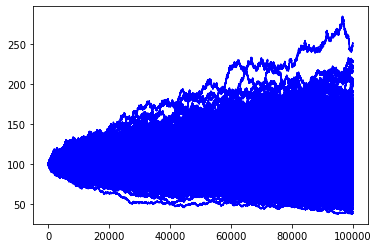

In [8]:
# coin flipping option model 

N = 100000
vola = 0.4
T = 0.5
K = 105
r = 0.05
dt = T/N
heads = np.exp(vola*np.sqrt(dt))
tails = np.exp(-vola*np.sqrt(dt))
S0 =100

p = (np.exp(r*dt)-tails)/(heads - tails)
paths = np.random.choice([heads,tails],p=[p,1-p],size=(N,1000))
plt.plot(paths.cumprod(axis=0)*100,color='blue');